In [2]:
! cd ~ && git clone https://github.com/jkobject/scDataLoader && git clone https://github.com/cantinilab/scPRINT

Cloning into 'scDataLoader'...
remote: Enumerating objects: 1691, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 1691 (delta 110), reused 103 (delta 78), pack-reused 1521 (from 1)
Receiving objects: 100% (1691/1691), 32.98 MiB | 38.03 MiB/s, done.
Resolving deltas: 100% (1090/1090), done.
Cloning into 'scPRINT'...
remote: Enumerating objects: 4991, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 4991 (delta 100), reused 110 (delta 63), pack-reused 4797 (from 2)
Receiving objects: 100% (4991/4991), 761.71 MiB | 43.03 MiB/s, done.
Resolving deltas: 100% (3411/3411), done.
Updating files: 100% (252/252), done.


In [ ]:
! conda install -c conda-forge -c tiledb tiledbsoma-py

In [ ]:
! pip install -e scDataLoader scPRINT

In [ ]:
! pip install --upgrade pandas numpy==1.26.0

In [1]:
! conda config --append gbm_hackathon/envs_dirs /home/ec2-user/SageMaker/.conda/envs
! nvidia-smi


CondaValueError: Key 'gbm_hackathon/envs_dirs' is not a known sequence parameter.

Mon Feb  3 10:35:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10G                    On  |   00000000:00:1E.0 Off |                    0 |
|  0%   22C    P8             15W /  300W |       1MiB /  23028MiB |      0%      Default |
|                                         |             

In [5]:
import lamindb_setup as ln_setup
ln_setup.init(storage="./testdb2", name="test2", schema="bionty")

CannotSwitchDefaultInstance: 
You cannot write to different instances in the same Python session.

Do you want to read from another instance via `Record.using()`? For example:

ln.Artifact.using("laminlabs/cellxgene").filter()

Or do you want to switch off auto-connect via `lamin settings set auto-connect false`?


In [3]:
# Load packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tiffslide
import seaborn as sns
import gget
import tifffile
import zarr

# MosaicDataset and BruceDataset classes allow loading and visualisation of the different data sources
from gbmhackathon import MosaicDataset, BruceDataset

In [4]:
import lamindb as ln
import pandas as pd
import numpy as np
from scdataloader import DataModule, Preprocessor, utils
from scdataloader.preprocess import additional_postprocess, additional_preprocess

→ connected lamindb: anonymous/test2


In [5]:
import os
import urllib.request
import torch

from scprint import scPrint
from scprint.tasks import Denoiser, Embedder
import scanpy as sc
import anndata as ad

In [3]:
utils.populate_my_ontology(
      organisms=["NCBITaxon:10090", "NCBITaxon:9606"],
      sex=["PATO:0000384", "PATO:0000383"],
      # celltypes=None,
      # ethnicities=None,
      # assays=None,
      # tissues=None,
      # diseases=None,
      # dev_stages=None,
  )

! ambiguous validation in Bionty for 1 record: 'NCBITaxon:10090'
! record with similar name exists! did you mean to load it?


,uid,name,ontology_id,abbr,synonyms,description,molecule,instrument,measurement,space_id,source_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,
3150,63btPuBB,fever of unknown origin,EFO:0003952,None,Unknown Origin Fevers|Unknown Origin Fever,Fever In Which The Etiology Cannot Be Ascertai...,None,None,None,1,67,None,2025-02-03 13:51:10.516000+00:00,1,None,1


→ returning existing DevelopmentalStage record with same name: 'unknown'
! records with similar names exist! did you mean to load one of them?


,uid,name,ontology_id,abbr,synonyms,description,space_id,source_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
4137,7hFw8TCo,normocytic anemia,MONDO:0004139,None,normocytic Anaemia|anaemia normocytic|anemia n...,Anemia In Which The Red Blood Cell Volume Is N...,1,50,None,2025-02-03 13:51:34.027000+00:00,1,None,1
6314,6NFTwVkD,normal breast-like subtype of breast carcinoma,MONDO:0006324,None,normal breast-like subtype of breast cancer|no...,A Biologic Subset Of Breast Carcinoma Defined ...,1,50,None,2025-02-03 13:51:34.211000+00:00,1,None,1
8213,6rzu5Y9W,normokalemic periodic paralysis,MONDO:0008225,None,normokalemic PP|normokalemic periodic paralysi...,None,1,50,None,2025-02-03 13:51:34.376000+00:00,1,None,1


! records with similar names exist! did you mean to load one of them?


,uid,name,ontology_id,abbr,synonyms,description,space_id,source_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
19372,5KqE5Q0L,unknown leukodystrophy,MONDO:0019397,None,None,None,1,50,None,2025-02-03 13:51:35.635000+00:00,1,None,1
7705,1wpjcCa5,hemoglobin--variants for which the chain carry...,MONDO:0007717,None,None,None,1,50,None,2025-02-03 13:51:34.333000+00:00,1,None,1
16575,2C05jMg9,sporadic adult-onset ataxia of unknown etiology,MONDO:0016591,None,SAOA|idiopathic late-onset cerebellar ataxia,Sporadic Adult-Onset Ataxia Of Unknown Etiolog...,1,50,None,2025-02-03 13:51:35.376000+00:00,1,None,1


In [9]:
# Look at the available data sources
MosaicDataset.sources.keys()

dict_keys(['clinical', 'bulk_rna', 'spatial', 'sc_rna', 'wes', 'he'])

In [10]:
source_dict_mosaic = MosaicDataset.load_tabular()

In [ ]:
single_cell_obj = MosaicDataset.load_singlecell()

In [3]:
single_cell_obj = sc.read_h5ad('scRNA_owkin_gbm.h5ad', backed="r")

In [28]:
adata = single_cell_obj[500_000:].to_memory()

In [6]:
ckpt_path = "large.ckpt"
if not os.path.exists(ckpt_path):
    url = "https://huggingface.co/jkobject/scPRINT/resolve/main/large.ckpt"
    urllib.request.urlretrieve(url, ckpt_path)

In [7]:
model = scPrint.load_from_checkpoint(
        ckpt_path,
        precpt_gene_emb=None,
        # triton gets installed so it must think it has cuda enabled
        transformer="normal", #else normal, without flashattention
)

changing the number of classes, could lead to issues
RuntimeError caught: scPrint is not attached to a `Trainer`.


In [29]:
adata.layers['ambient_rna_removed'].data = np.round(adata.layers['ambient_rna_removed'].data)

In [30]:
adata.X = adata.layers['ambient_rna_removed']

In [31]:
del adata.layers

In [32]:
adata.obs['organism_ontology_term_id'] = "NCBITaxon:9606"
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True, do_postp=False, use_raw=False)
adata = preprocessor(adata.copy())
adata

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
removed 0 non primary cells, 120451 renamining
filtered out 0 cells, 120451 renamining
Removed 0 genes.
startin QC
Seeing 25166 outliers (20.89% of total dataset):
done
AnnData object with n_obs × n_vars = 120451 × 70611
    obs: 'orig.ident', 'percent_reads_mt', 'percent_reads_ribo', 'percent_reads_hb', 'doublet_score_scdblfinder', 'doublet_predicted_scdblfinder', 'seurat_clusters', 'seurat_clusters_res_0.1', 'seurat_clusters_res_0.2', 'seurat_clusters_res_0.4', 'seurat_clusters_res_0.6', 'seurat_clusters_res_0.8', 'seurat_clusters_res_1', 'seurat_clusters_res_2', 'origin', '_scvi_batch', '_scvi_labels', 'scanvi_score', 'celltype_level1_scanvi', 'celltype_level2_scanvi', 'celltype_level3_scanvi', 'celltype_level4_scanvi', 'celltype_level_custom1_scanvi', 'SCT_snn_res.0.4', 'SCT_snn_res.2', 'seurat_clusters_heterogeneity', 'seurat_clusters_res_1.5', 'seurat_clusters_res_2.5', 'seurat_clusters_res_3', 'seurat_clusters_re

AnnData object with n_obs × n_vars = 120451 × 70611
    obs: 'orig.ident', 'percent_reads_mt', 'percent_reads_ribo', 'percent_reads_hb', 'doublet_score_scdblfinder', 'doublet_predicted_scdblfinder', 'seurat_clusters', 'seurat_clusters_res_0.1', 'seurat_clusters_res_0.2', 'seurat_clusters_res_0.4', 'seurat_clusters_res_0.6', 'seurat_clusters_res_0.8', 'seurat_clusters_res_1', 'seurat_clusters_res_2', 'origin', '_scvi_batch', '_scvi_labels', 'scanvi_score', 'celltype_level1_scanvi', 'celltype_level2_scanvi', 'celltype_level3_scanvi', 'celltype_level4_scanvi', 'celltype_level_custom1_scanvi', 'SCT_snn_res.0.4', 'SCT_snn_res.2', 'seurat_clusters_heterogeneity', 'seurat_clusters_res_1.5', 'seurat_clusters_res_2.5', 'seurat_clusters_res_3', 'seurat_clusters_res_3.5', 'seurat_clusters_res_4', 'organism_ontology_term_id', 'nnz', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_m

In [33]:
adata.write_h5ad('scRNA_owkin_gbm_6.h5ad')

... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'description' as categorical
... storing 'organism' as categorical


In [34]:
del adata

In [ ]:
! scprint embed --adata scRNA_owkin_gbm_3.h5ad --ckpt_path large.ckpt --output_filename scRNA_owkin
_gbm_3 --batch_size 20 --num_workers 20 --max_len 4000 --keep_all_cls_pred False --species "NCBITaxon:9606"

In [24]:
files = [ad.read_h5ad(f"scRNA_owkin_gbm_{i}_embedded.h5ad") for i in range(1,4)]
adata = ad.concat(files)

In [13]:
adata

AnnData object with n_obs × n_vars = 299996 × 70611
    obs: 'orig.ident', 'percent_reads_mt', 'percent_reads_ribo', 'percent_reads_hb', 'doublet_score_scdblfinder', 'doublet_predicted_scdblfinder', 'seurat_clusters', 'seurat_clusters_res_0.1', 'seurat_clusters_res_0.2', 'seurat_clusters_res_0.4', 'seurat_clusters_res_0.6', 'seurat_clusters_res_0.8', 'seurat_clusters_res_1', 'seurat_clusters_res_2', 'origin', '_scvi_batch', '_scvi_labels', 'scanvi_score', 'celltype_level1_scanvi', 'celltype_level2_scanvi', 'celltype_level3_scanvi', 'celltype_level4_scanvi', 'celltype_level_custom1_scanvi', 'SCT_snn_res.0.4', 'SCT_snn_res.2', 'seurat_clusters_heterogeneity', 'seurat_clusters_res_1.5', 'seurat_clusters_res_2.5', 'seurat_clusters_res_3', 'seurat_clusters_res_3.5', 'seurat_clusters_res_4', 'organism_ontology_term_id', 'nnz', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_m

In [7]:
val = sc.pp.pca(adata.obsm['scprint'], return_info=True)

In [36]:
val[3]

array([9.17346456, 7.09675828, 5.33689145, 5.05413007, 3.25813972,
       2.72887652, 2.65610406, 2.01591068, 1.85982641, 1.68060114,
       1.54309218, 1.40816878, 1.30668678, 1.21189343, 1.16244323,
       1.04771194, 0.94121298, 0.89720381, 0.85211384, 0.81046934,
       0.78407015, 0.73655493, 0.67531782, 0.65889353, 0.59608921,
       0.57331419, 0.53846116, 0.50547514, 0.49432985, 0.47766692,
       0.44724891, 0.43992744, 0.42793622, 0.40339295, 0.37179877,
       0.36576123, 0.3548549 , 0.33624183, 0.31873125, 0.30203029,
       0.28694538, 0.28234663, 0.27328445, 0.26063651, 0.24556672,
       0.24120725, 0.22731467, 0.22241155, 0.21505689, 0.20913483])

In [8]:
adata.obsm['scprint_pca'] = val[0]

In [9]:
sc.pp.neighbors(adata, use_rep="scprint_pca", n_neighbors=10)
sc.tl.umap(adata, min_dist=0.1)

In [25]:
rn = {i:i if n>300 else 'uncertain' for i,n in adata.obs.conv_pred_cell_type_ontology_term_id.value_counts().items()}

In [26]:
adata.obs['simp_cell_type_pred'] = adata.obs.conv_pred_cell_type_ontology_term_id
adata.obs['simp_cell_type_pred'] = adata.obs['simp_cell_type_pred'].replace(rn) 

/tmp/ipykernel_25432/853131605.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['simp_cell_type_pred'] = adata.obs['simp_cell_type_pred'].replace(rn)


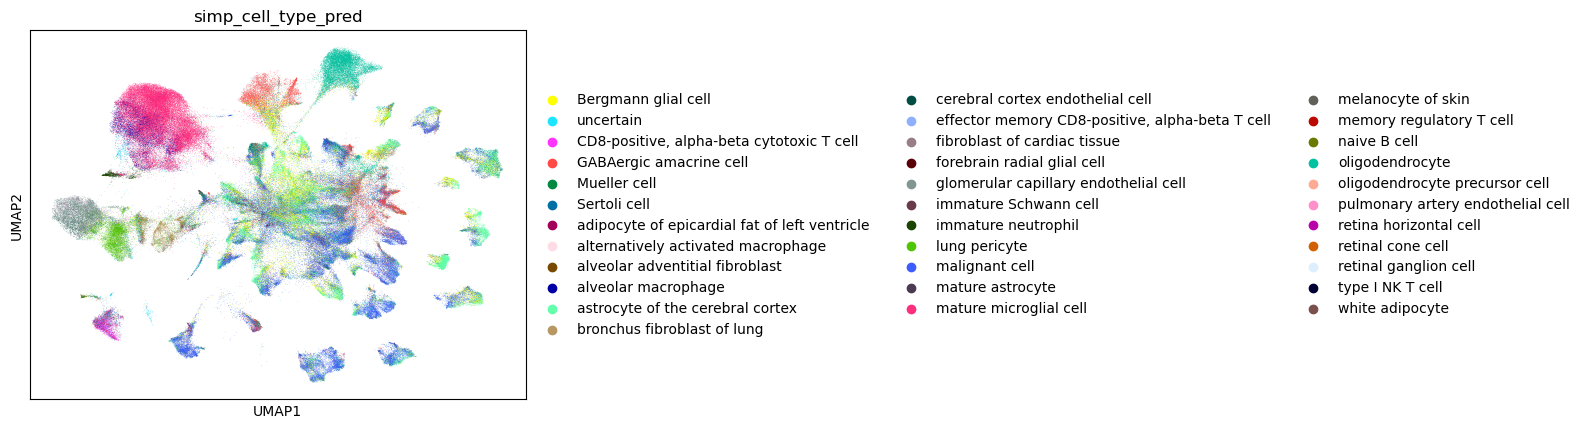

In [27]:
sc.pl.umap(adata, color="simp_cell_type_pred")

In [28]:
rn = {i:i if n>4000 else 'disease' for i,n in adata.obs.conv_pred_disease_ontology_term_id.value_counts().items()}
rn

{'glioblastoma': 'glioblastoma',
 'normal': 'normal',
 'COVID-19': 'disease',
 'pilocytic astrocytoma': 'disease',
 'clear cell renal carcinoma': 'disease',
 'pulmonary fibrosis': 'disease',
 'lung adenocarcinoma': 'disease',
 'small cell lung carcinoma': 'disease',
 'Lewy body dementia': 'disease',
 'squamous cell lung carcinoma': 'disease',
 'kidney oncocytoma': 'disease',
 'plasma cell myeloma': 'disease',
 'Alzheimer disease': 'disease',
 'periodontitis': 'disease',
 'myocardial infarction': 'disease',
 'follicular lymphoma': 'disease',
 'pneumonia': 'disease',
 'hydrosalpinx': 'disease',
 'chronic rhinitis': 'disease'}

In [29]:
adata.obs['simp_disease_pred'] = adata.obs.conv_pred_disease_ontology_term_id
adata.obs['simp_disease_pred'] = adata.obs['simp_disease_pred'].replace(rn) 

/tmp/ipykernel_25432/4094694661.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['simp_disease_pred'] = adata.obs['simp_disease_pred'].replace(rn)


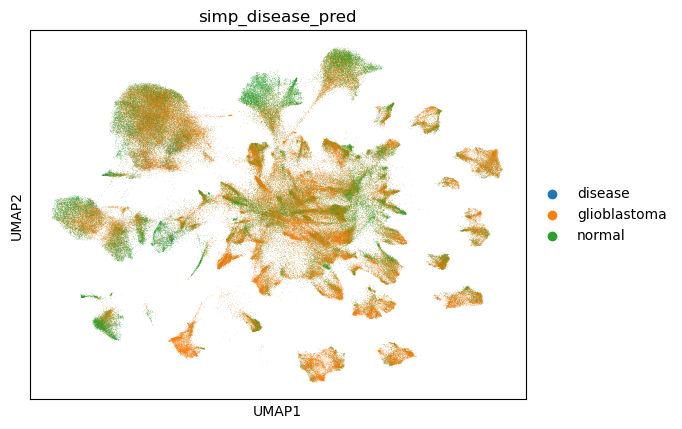

In [30]:
sc.pl.umap(adata, color="simp_disease_pred")

In [33]:
adata.obs['simp_cell_type_pred'][adata.obs['simp_disease_pred']=="glioblastoma"].value_counts()

simp_cell_type_pred
malignant cell                                     54283
astrocyte of the cerebral cortex                   33124
mature microglial cell                             28376
Bergmann glial cell                                19106
oligodendrocyte                                    12688
lung pericyte                                       4621
glomerular capillary endothelial cell               4548
GABAergic amacrine cell                             3556
cerebral cortex endothelial cell                    2799
Mueller cell                                        2503
oligodendrocyte precursor cell                      2196
alveolar macrophage                                 1887
immature Schwann cell                               1424
bronchus fibroblast of lung                         1333
alternatively activated macrophage                  1054
uncertain                                           1021
adipocyte of epicardial fat of left ventricle        679
forebrain r

In [32]:
adata.obs['simp_cell_type_pred'][adata.obs['simp_disease_pred']=="disease"].value_counts()

simp_cell_type_pred
mature microglial cell                             1975
Bergmann glial cell                                1052
alveolar macrophage                                 999
bronchus fibroblast of lung                         569
glomerular capillary endothelial cell               386
lung pericyte                                       385
malignant cell                                      293
uncertain                                           248
alternatively activated macrophage                  198
immature neutrophil                                 120
CD8-positive, alpha-beta cytotoxic T cell            89
oligodendrocyte                                      87
memory regulatory T cell                             60
cerebral cortex endothelial cell                     56
adipocyte of epicardial fat of left ventricle        47
Sertoli cell                                         42
astrocyte of the cerebral cortex                     35
oligodendrocyte precursor ce

In [34]:
adata = ad.read_h5ad(f"scRNA_owkin_gbm_3_v2_embedded.h5ad")

In [36]:
val = sc.pp.pca(adata.obsm['scprint'], return_info=True)

In [37]:
adata.obsm['scprint_pca'] = val[0]

In [38]:
sc.pp.neighbors(adata, use_rep="scprint_pca", n_neighbors=10)
sc.tl.umap(adata, min_dist=0.1)

In [40]:
rn = {i:i if n>300 else 'uncertain' for i,n in adata.obs.conv_pred_cell_type_ontology_term_id.value_counts().items()}

In [41]:
adata.obs['simp_cell_type_pred'] = adata.obs.conv_pred_cell_type_ontology_term_id
adata.obs['simp_cell_type_pred'] = adata.obs['simp_cell_type_pred'].replace(rn) 

/tmp/ipykernel_25432/853131605.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['simp_cell_type_pred'] = adata.obs['simp_cell_type_pred'].replace(rn)


In [45]:
adata

AnnData object with n_obs × n_vars = 99998 × 70611
    obs: 'orig.ident', 'percent_reads_mt', 'percent_reads_ribo', 'percent_reads_hb', 'doublet_score_scdblfinder', 'doublet_predicted_scdblfinder', 'seurat_clusters', 'seurat_clusters_res_0.1', 'seurat_clusters_res_0.2', 'seurat_clusters_res_0.4', 'seurat_clusters_res_0.6', 'seurat_clusters_res_0.8', 'seurat_clusters_res_1', 'seurat_clusters_res_2', 'origin', '_scvi_batch', '_scvi_labels', 'scanvi_score', 'celltype_level1_scanvi', 'celltype_level2_scanvi', 'celltype_level3_scanvi', 'celltype_level4_scanvi', 'celltype_level_custom1_scanvi', 'SCT_snn_res.0.4', 'SCT_snn_res.2', 'seurat_clusters_heterogeneity', 'seurat_clusters_res_1.5', 'seurat_clusters_res_2.5', 'seurat_clusters_res_3', 'seurat_clusters_res_3.5', 'seurat_clusters_res_4', 'organism_ontology_term_id', 'nnz', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt

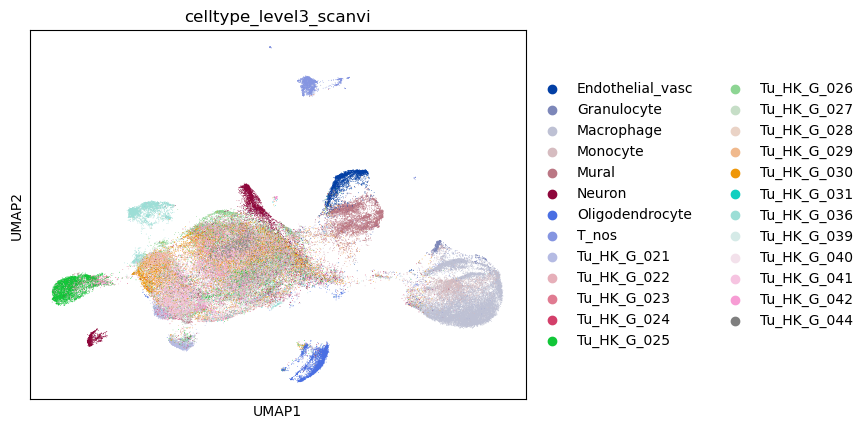

In [53]:
sc.pl.umap(adata, color="celltype_level3_scanvi", )

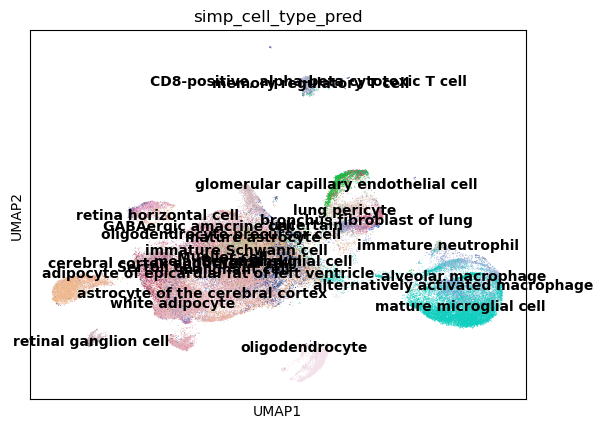

In [54]:
sc.pl.umap(adata, color="simp_cell_type_pred", legend_loc="on data")

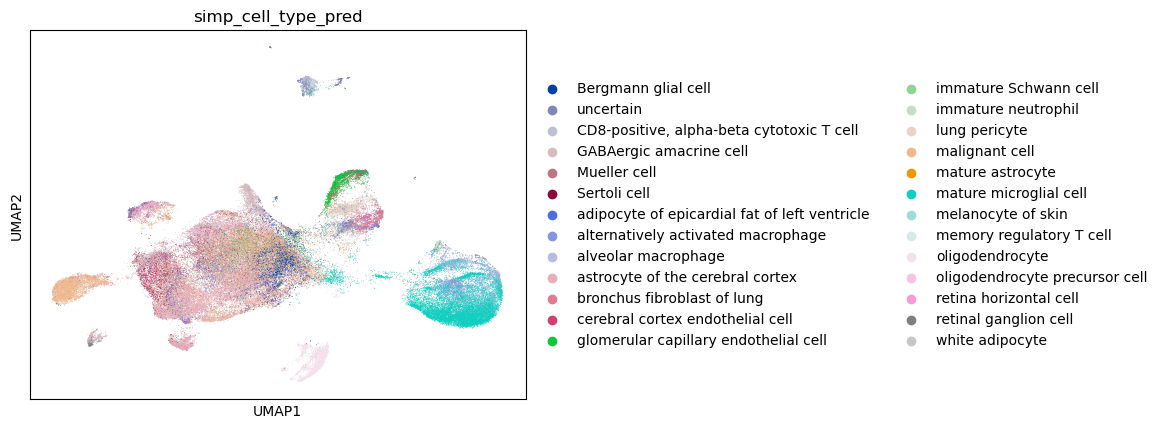

In [51]:
sc.pl.umap(adata, color="simp_cell_type_pred", )

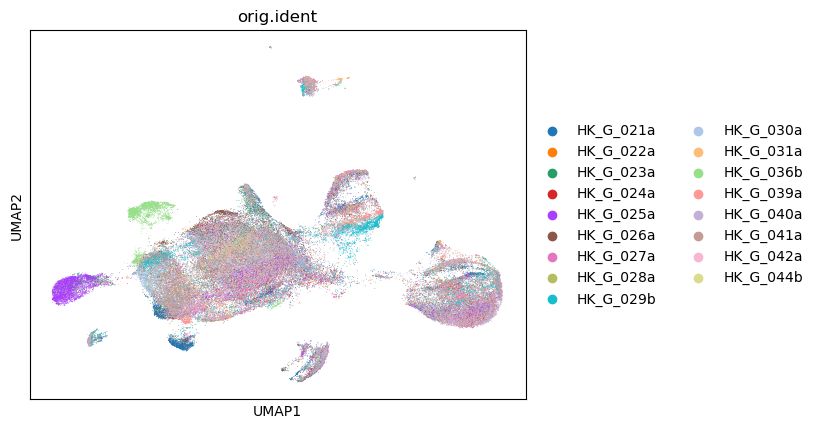

In [50]:
sc.pl.umap(adata, color="orig.ident", )